In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

Using the data contained in within the `PatientData.xlsx` answer the following questions. 

This data was culled from a set of HIV drug studies in which one of four drugs were given to patients. Many clinical parameters were collected at each of 4 monthly follow-up visits but we will focus on the patient's Viral Load. This is a measure of the amount of HIV RNA is present in the blood which is a good proxy for the health of a patient. Low viral loads indicate that the medication is effectively suppressing viral replication.

Data Description:
  - Age: The patient's age, in years.
  - Drug: The treatment provided to the patient.
  - Month0: The initial viral load (copies/uL) at the beginning of the study.
  - Month1-Month4: The viral loads at monthly followups for 4 months.

In [9]:
pat_df = pd.read_excel('PatientData.xlsx')
pat_df.head()

,Age,Drug,Month0,Month1,Month2,Month3,Month4
0,30,Drug2,5.636962e+06,1.059754e+06,199236.288295,37462.998812,7044.503429
1,54,Drug2,2.260656e+06,6.510708e+05,187551.663442,54050.023993,15571.524033
2,30,Drug3,1.508800e+06,1.434082e+05,13657.120780,1299.166239,142.099372
3,19,Drug2,1.298145e+06,2.440952e+05,45971.968628,8644.024352,1647.873818
4,62,Drug1,7.156592e+06,5.582156e+05,43632.795374,3463.810311,276.337802


# Basic Statistics

Use the `.describe()` method on the ages of the patients in the study.

In [11]:
pat_df['Age'].describe()

count    500.000000
mean      53.610000
std       21.356453
min       18.000000
25%       35.000000
50%       54.000000
75%       73.000000
max       89.000000
Name: Age, dtype: float64

Use the `.describe()` method on the initial viral load of the patients within the study.

In [13]:
# the initial viral load is month 0 of the excel sheet
pat_df['Month0'].describe()

count    5.000000e+02
mean     3.947745e+06
std      2.557964e+06
min      1.003915e+06
25%      1.768648e+06
50%      3.256761e+06
75%      5.625739e+06
max      9.986100e+06
Name: Month0, dtype: float64

How many patients were randomized into each drug group?

In [14]:
pat_drug_counts = pat_df['Drug'].value_counts()
pat_drug_counts

Drug2    132
Drug1    128
Drug3    124
Drug4    116
Name: Drug, dtype: int64

Plot this distribution as a bar-plot. Make sure to add axis labels. Write a figure caption describing your results.

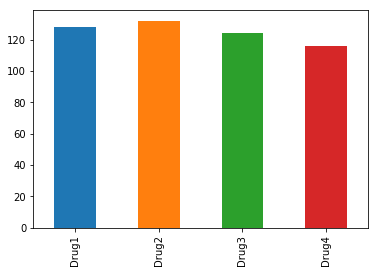

In [16]:
#Create the figure and axis
fig, ax = plt.subplots(1,1)

# Use the pd.Series.plot method to make the bar-plot
order = ['Drug1', 'Drug2', 'Drug3', 'Drug4']
pat_drug_counts.loc[order].plot(kind='bar', ax=ax)

# Add axes labels and a figure caption


__Are there an equal number of patients taking each drug?__

### Figure 1

__There is an equal of patients taking each drug.__ The number of patients taking each therapy was plotted as a bar-chart with the height indicating the number patients in each category.

# Drug Analysis

Using logical indexing isolate the intitial viral loads of the patients taking each drug and then plot the average viral load as a bar-chart.

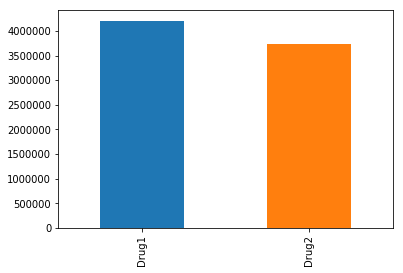

In [17]:
mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'

mu1 = pat_df.loc[mask1, 'Month0'].mean()
mu2 = pat_df.loc[mask2, 'Month0'].mean()

init_viral_mean = pd.Series([mu1, mu2], 
                            index=['Drug1', 'Drug2'])

fig, ax = plt.subplots(1,1)

init_viral_mean.plot(kind='bar', ax=ax)


Utilizing the same strategy create a plot that shows the average initial viral-loads and final viral loads of patients taking each drug. Use the left axis `init_ax` for the initial values and the right axis `final_ax` for the final viral loads. 

Adjust the `plt.subplots` command to synchronize the two y-axes.
Then:
  - Adjust the y-limits and the y-scale to be a log-scale
  - Use seaborn to despine the right and top axis lines
  - Give the y-axis a sensical label
  
After this scaling, _are the initial viral loads of patients comparable across treatments?_

Utilizing the subplot command. Create a figure that contains both of these plots. Synchronize overlapping axes. Write a figure caption describing the results of the figure.

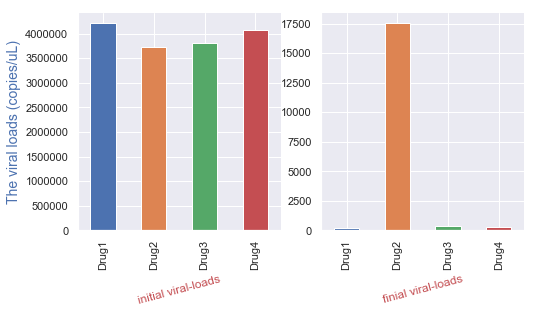

In [129]:
#label/split all drug into 1 2 3 4 as mask 1 2 3 4 
#note that both of the init_ax and the final_ax are use for all drug

mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'
mask3 = pat_df['Drug'] == 'Drug3'
mask4 = pat_df['Drug'] == 'Drug4'

#the average initial viral-loads which is the mean of the Month0 write as init_ax
init_mu1 = pat_df.loc[mask1, 'Month0'].mean()
init_mu2 = pat_df.loc[mask2, 'Month0'].mean()
init_mu3 = pat_df.loc[mask3, 'Month0'].mean()
init_mu4 = pat_df.loc[mask4, 'Month0'].mean()

init_viral_mean = pd.Series([init_mu1, init_mu2, init_mu3, init_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

#the average final viral loads of patients which is the mean of the Month4 write as final_ax
final_mu1 = pat_df.loc[mask1, 'Month4'].mean()
final_mu2 = pat_df.loc[mask2, 'Month4'].mean()
final_mu3 = pat_df.loc[mask3, 'Month4'].mean()
final_mu4 = pat_df.loc[mask4, 'Month4'].mean()

final_viral_mean = pd.Series([final_mu1, final_mu2, final_mu3, final_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

# using the subplots two creat two plot of the initial viral-loads and the finial viral-loads
fig, (init_ax, final_ax) = plt.subplots(1,2, figsize=(8,4))


# store the plot of initial viral-loads on the left of the subplots 
plt.subplot(1,2,1)
init_viral_mean.plot(kind='bar')
plt.xlabel('initial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')
# Give the y-axis a sensical label
plt.ylabel('The viral loads (copies/uL)', fontsize=14, color = 'b')

# store the plot of finial viral-loads on the right of the subplots 
plt.subplot(1,2,2)
final_viral_mean.plot(kind='bar')
plt.xlabel('finial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')

#Use seaborn to despine the right and top axis lines
sbn.despine(top=True, right=True, left=False, bottom=False)


__Did we pick equally "sick" patients to take each drug? Did one drug perform better at reducing the viral load of patients?__

### Figure 2
__Yes, we pick equally "sick" patients to take each drug.__ Base on comparing the subpolts, the Durg 1 perform better at reducing the viral load of patients (it initial viral-load is supper high, and it shows the lowest/smallest final viral-load). 


# Trajectory Analysis

Using a for-loop, iterate through all rows of the `pat_df` Dataframe and plot the trajectory of the patient's viral load as an independent line. Use the `alpha` parameter of the plotting function to make each line transparent.

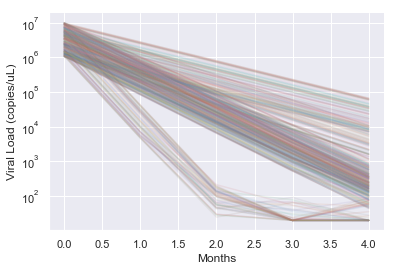

In [135]:
fig, ax = plt.subplots(1,1)

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

for _, row in pat_df.iterrows():
    
    ax.plot(row[index].values, alpha=0.1)
    
ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)

Redo the figure above such that each drug plotted in a different color. Utilize a `dict` to define a color for each drug and then add that to the plotting arguement. Be sure to add axes labels as well as figure caption.

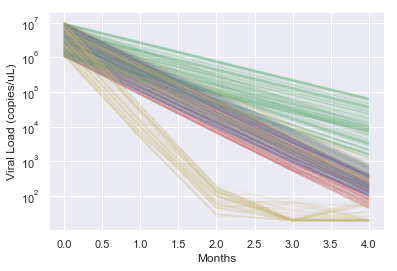

In [219]:
fig, ax = plt.subplots(1,1)

# mark for each drug
mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'
mask3 = pat_df['Drug'] == 'Drug3'
mask4 = pat_df['Drug'] == 'Drug4'

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

# for Drug 1
Drug1_mu1 = pat_df.loc[mask1]
for _, row in Drug1_mu1.iterrows():
    
    ax.plot(row[index].values, alpha=0.1,color = 'r')

# for Drug 2
Drug1_mu2 = pat_df.loc[mask2]
for _, row in Drug1_mu2.iterrows():
    
    ax.plot(row[index].values, alpha=0.1,color = 'g') 

# for Drug 3
Drug1_mu3 = pat_df.loc[mask3]
for _, row in Drug1_mu3.iterrows():
    
    ax.plot(row[index].values, alpha=0.1,color = 'b') 

# for Drug 4
Drug1_mu4 = pat_df.loc[mask4]
for _, row in Drug1_mu4.iterrows():
    
    ax.plot(row[index].values, alpha=0.1,color = 'y') 

ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)


__Is there a drug which reduces patient viral loads faster than others?__

### Figure 3
__Yes, drug4 which is present yellow color on the graph reduces patient viral loads faster than others.__ The entire graph present the reduces rate for each drugs with different color. Based on the graph, the drig 2 resuced patient viral loads slowter, Drugs 1 & 3 which are present as red and blue color in the figure are present a similar reduces rate which are also a little bit faster than Drugs 2. Drug4 present the reduces rate of patient viral loads faster than others.


# Age Specific Differences

Based on the mechanism of action of these drugs it is possible that they have an age dependent effect. Calculate the percentage change in the first month of the study for three different age ranges:
  - 18-30
  - 30-50
  - 50-70
  
  
Are there noticible difference between ages? Which drug would you suggest for each age-group?

__By comparing the result of each age group, there is not significant difference between Young age group and Middle age group.__ The Yougn age group contains patients from 18 too 30 years old; the middle age group contains patients from 30 to 50 years old, and the old age group is containing patients from 50 to 7o years old. Base for the resut, the drug 4 contains the heighest reduce rate of the viral loads in both those two groups (Young and Middle). The drug 1 is best for the old group because the reducing rate of the drug 1 is bigger than others. As a result, for patients whoes age is from 18 to 50 (Yougn and Meddile age grooup), Drug 4 is the best choice, and for the patient with age from 50 to 70, drug 1 is better. 


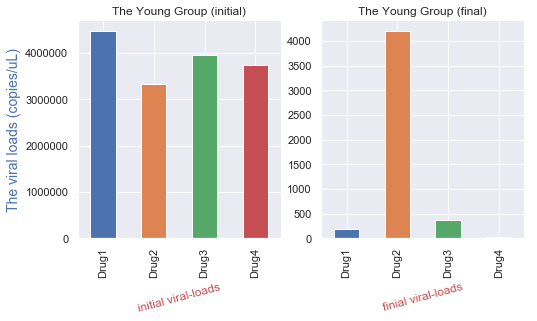

In [194]:
# split all patients into three age group
# for Young group
Young = pat_df.query('Age >= 18 & Age <30')

# split patient into differenct drug goups
Youngmask1 = Young['Drug'] == 'Drug1'
Youngmask2 = Young['Drug'] == 'Drug2'
Youngmask3 = Young['Drug'] == 'Drug3'
Youngmask4 = Young['Drug'] == 'Drug4'
# for young group, see which durgs is best 
Younginit_mu1 = Young.loc[Youngmask1,'Month0'].mean()
Younginit_mu2 = Young.loc[Youngmask2,'Month0'].mean()
Younginit_mu3 = Young.loc[Youngmask3,'Month0'].mean()
Younginit_mu4 = Young.loc[Youngmask4,'Month0'].mean()
Younginit_viral_mean = pd.Series([Younginit_mu1, Younginit_mu2, Younginit_mu3, Younginit_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

#the average final viral loads of patients which is the mean of the Month4 write as final_ax
Youngfinal_mu1 = Young.loc[Youngmask1, 'Month4'].mean()
Youngfinal_mu2 = Young.loc[Youngmask2, 'Month4'].mean()
Youngfinal_mu3 = Young.loc[Youngmask3, 'Month4'].mean()
Youngfinal_mu4 = Young.loc[Youngmask4, 'Month4'].mean()

Youngfinal_viral_mean = pd.Series([Youngfinal_mu1, Youngfinal_mu2, Youngfinal_mu3, Youngfinal_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

# using the subplots two creat two plot of the initial viral-loads and the finial viral-loads
fig, (Younginit_ax, Youngfinal_ax) = plt.subplots(1,2, figsize=(8,4))


# store the plot of initial viral-loads on the left of the subplots 
plt.subplot(1,2,1)
Younginit_viral_mean.plot(kind='bar')
plt.title('The Young Group (initial)')
plt.xlabel('initial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')
# Give the y-axis a sensical label
plt.ylabel('The viral loads (copies/uL)', fontsize=14, color = 'b')

# store the plot of finial viral-loads on the right of the subplots 
plt.subplot(1,2,2)
plt.title('The Young Group (final)')
Youngfinal_viral_mean.plot(kind='bar')
plt.xlabel('finial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')

#Use seaborn to despine the right and top axis lines
sbn.despine(top=True, right=True, left=False, bottom=False)

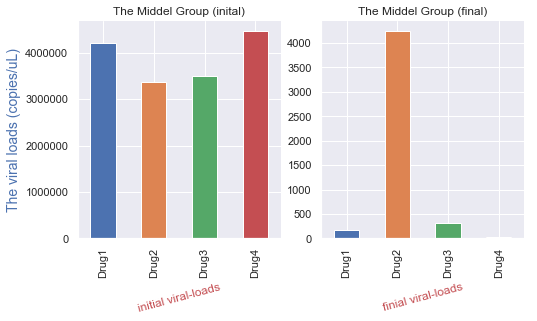

In [195]:
# for Middel group
Middel = pat_df.query('Age >= 30 & Age <50')
# split patient into differenct drug goups
Middelmask1 = Middel['Drug'] == 'Drug1'
Middelmask2 = Middel['Drug'] == 'Drug2'
Middelmask3 = Middel['Drug'] == 'Drug3'
Middelmask4 = Middel['Drug'] == 'Drug4'
# for Middel group, see which durgs is best 
Middelinit_mu1 = Middel.loc[Middelmask1,'Month0'].mean()
Middelinit_mu2 = Middel.loc[Middelmask2,'Month0'].mean()
Middelinit_mu3 = Middel.loc[Middelmask3,'Month0'].mean()
Middelinit_mu4 = Middel.loc[Middelmask4,'Month0'].mean()
Middelinit_viral_mean = pd.Series([Middelinit_mu1, Middelinit_mu2, Middelinit_mu3, Middelinit_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

#the average final viral loads of patients which is the mean of the Month4 write as final_ax
Middelfinal_mu1 = Middel.loc[Middelmask1, 'Month4'].mean()
Middelfinal_mu2 = Middel.loc[Middelmask2, 'Month4'].mean()
Middelfinal_mu3 = Middel.loc[Middelmask3, 'Month4'].mean()
Middelfinal_mu4 = Middel.loc[Middelmask4, 'Month4'].mean()

Middelfinal_viral_mean = pd.Series([Middelfinal_mu1, Middelfinal_mu2, Middelfinal_mu3, Middelfinal_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

# using the subplots two creat two plot of the initial viral-loads and the finial viral-loads
fig, (Middelinit_ax, Middelfinal_ax) = plt.subplots(1,2, figsize=(8,4))


# store the plot of initial viral-loads on the left of the subplots 
plt.subplot(1,2,1)
Middelinit_viral_mean.plot(kind='bar')
plt.title('The Middel Group (inital)')
plt.xlabel('initial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')
# Give the y-axis a sensical label
plt.ylabel('The viral loads (copies/uL)', fontsize=14, color = 'b')

# store the plot of finial viral-loads on the right of the subplots 
plt.subplot(1,2,2)
plt.title('The Middel Group (final)')
Middelfinal_viral_mean.plot(kind='bar')
plt.xlabel('finial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')

#Use seaborn to despine the right and top axis lines
sbn.despine(top=True, right=True, left=False, bottom=False)

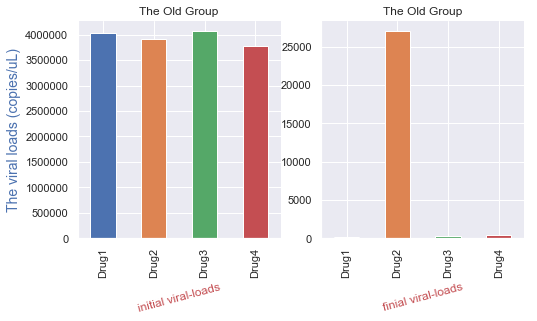

In [193]:
# for Middel group
Old = pat_df.query('Age >= 50 & Age <=70')
# split patient into differenct drug goups 
Oldmask1 = Old['Drug'] == 'Drug1'
Oldmask2 = Old['Drug'] == 'Drug2'
Oldmask3 = Old['Drug'] == 'Drug3'
Oldmask4 = Old['Drug'] == 'Drug4'
# for old group, see which durgs is best 
oldinit_mu1 = Old.loc[Oldmask1,'Month0'].mean()
oldinit_mu2 = Old.loc[Oldmask2,'Month0'].mean()
oldinit_mu3 = Old.loc[Oldmask3,'Month0'].mean()
oldinit_mu4 = Old.loc[Oldmask4,'Month0'].mean()
oldinit_viral_mean = pd.Series([oldinit_mu1, oldinit_mu2, oldinit_mu3, oldinit_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

#the average final viral loads of patients which is the mean of the Month4 write as final_ax
oldfinal_mu1 = Old.loc[Oldmask1, 'Month4'].mean()
oldfinal_mu2 = Old.loc[Oldmask2, 'Month4'].mean()
oldfinal_mu3 = Old.loc[Oldmask3, 'Month4'].mean()
oldfinal_mu4 = Old.loc[Oldmask4, 'Month4'].mean()

oldfinal_viral_mean = pd.Series([oldfinal_mu1, oldfinal_mu2, oldfinal_mu3, oldfinal_mu4], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

# using the subplots two creat two plot of the initial viral-loads and the finial viral-loads
fig, (oldinit_ax, oldfinal_ax) = plt.subplots(1,2, figsize=(8,4))


# store the plot of initial viral-loads on the left of the subplots 
plt.subplot(1,2,1)
oldinit_viral_mean.plot(kind='bar')
plt.title('The Old Group (inital)')
plt.xlabel('initial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')
# Give the y-axis a sensical label
plt.ylabel('The viral loads (copies/uL)', fontsize=14, color = 'b')

# store the plot of finial viral-loads on the right of the subplots 
plt.subplot(1,2,2)
plt.title('The Old Group (final)')
oldfinal_viral_mean.plot(kind='bar')
plt.xlabel('finial viral-loads', fontsize=12,color = 'r', rotation=15)
# Adjust the y-limits and the y-scale to be a log-scale
ax.set_yscale('log')

#Use seaborn to despine the right and top axis lines
sbn.despine(top=True, right=True, left=False, bottom=False)